# **COMP4035. Computer Science Applications**

# *coursework*



---

---



---







# **2.	Dataset acquisition and preparation**



---



# a) Obtain the dataset, load it and conduct brief research - inspect the data (check variables, the shape of the dataset, check for missing values, etc.)

import the libraries needed in order for the code to work and to be able to manipulate and clean the data

In [ ]:
# majority of the libraries needed are imported here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.preprocessing import LabelEncoder
wr.filterwarnings('ignore')





Reading my data set :

Here I am going to read the data and perform brief research such as ( data types and missing values)  

In [ ]:
dataset = pd.read_csv('car.data')
dataset.shape
dataset.info()
dataset.describe()


# Creates a dictionary which prints out a table summarising the dataset properties

dataset_summary = {
    "Shape": dataset.shape,
    "Columns": dataset.columns.tolist(),
    "First 5 Rows": dataset.head(),
    "Data Types": dataset.dtypes,
    "Missing Values": dataset.isnull().sum()
}

dataset_summary



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


{'Shape': (1727, 7),
 'Columns': ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'],
 'First 5 Rows':    vhigh vhigh.1  2 2.1  small   low  unacc
 0  vhigh   vhigh  2   2  small   med  unacc
 1  vhigh   vhigh  2   2  small  high  unacc
 2  vhigh   vhigh  2   2    med   low  unacc
 3  vhigh   vhigh  2   2    med   med  unacc
 4  vhigh   vhigh  2   2    med  high  unacc,
 'Data Types': vhigh      object
 vhigh.1    object
 2          object
 2.1        object
 small      object
 low        object
 unacc      object
 dtype: object,
 'Missing Values': vhigh      0
 vhigh.1    0
 2          0
 2.1        0
 small      0
 low        0
 unacc      0
 dtype: int64}

In [ ]:
dataset = pd.read_csv("car.data")
print (dataset.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


/////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
# Check the names of the columns
# converts the column names into a Python list, convenient way to access and manipulate column names
dataset.columns.tolist()

['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']

 checks for missing values

In [ ]:
dataset.isnull().sum()

,0
vhigh,0
vhigh.1,0
2,0
2.1,0
small,0
low,0
unacc,0


there is no missing values so this does not need to be handled

 check for duplicate values :

In [ ]:
dataset.nunique() # check for duplicate values

,0
vhigh,4
vhigh.1,4
2,4
2.1,3
small,3
low,3
unacc,4


In [ ]:
# the data of the duplicated values
dataset.duplicated().sum()

0

In [ ]:
#Show duplicate rows
dataset[dataset.duplicated]

,vhigh,vhigh.1,2,2.1,small,low,unacc


In [ ]:
#Identify and display all duplicated rows

duplicated_full = dataset[dataset.duplicated(keep=False)]

print("All duplicated rows in car dataset:") # Print a header
print(duplicated_full) # Print the DataFrame using pandas display method

All duplicated rows in car dataset:
Empty DataFrame
Columns: [vhigh, vhigh.1, 2, 2.1, small, low, unacc]
Index: []


# b)	Clean and preprocess the data if necessary (e.g., handle missing values, encode categorical attributes, and shuffle the dataset).



*   No missing values to handle
*   check for any categorical columns and if so change them to numerical



In [ ]:
# Rename columns for better understanding
column_names = ["Buying", "Maint", "Doors", "Persons", "Lug_Boot", "Safety", "Class"]
dataset.columns = column_names

In [ ]:
# Checks for categorical columns

categorical_cols = dataset.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


# Checks for numerical columns
numerical_cols = dataset.select_dtypes(include=['number']).columns
print("\nNumerical Columns:", numerical_cols.tolist())




Categorical columns: Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boot', 'Safety', 'Class'], dtype='object')

Numerical Columns: []


In [ ]:
# Identify categorical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Display unique values in each categorical column
print("\nUnique categories in each categorical column:")
for col in categorical_cols:
    print(f"\n{col}: {dataset[col].unique()}")


Unique categories in each categorical column:

Buying: ['vhigh' 'high' 'med' 'low']

Maint: ['vhigh' 'high' 'med' 'low']

Doors: ['2' '3' '4' '5more']

Persons: ['2' '4' 'more']

Lug_Boot: ['small' 'med' 'big']

Safety: ['med' 'high' 'low']

Class: ['unacc' 'acc' 'vgood' 'good']


 Now we know what the categorical columns are and their values we need to use label encoding to help change this to a numerical format

In [ ]:
# label encoding is used as this technqiue allows for the conversion of categorical variables into a numerical format

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    dataset[col + '_LabelEncoded'] = le.fit_transform(dataset[col])


print(dataset.head())


  Buying  Maint Doors Persons Lug_Boot Safety  Class  Buying_LabelEncoded  \
0  vhigh  vhigh     2       2    small    med  unacc                    3   
1  vhigh  vhigh     2       2    small   high  unacc                    3   
2  vhigh  vhigh     2       2      med    low  unacc                    3   
3  vhigh  vhigh     2       2      med    med  unacc                    3   
4  vhigh  vhigh     2       2      med   high  unacc                    3   

   Maint_LabelEncoded  Doors_LabelEncoded  Persons_LabelEncoded  \
0                   3                   0                     0   
1                   3                   0                     0   
2                   3                   0                     0   
3                   3                   0                     0   
4                   3                   0                     0   

   Lug_Boot_LabelEncoded  Safety_LabelEncoded  Class_LabelEncoded  
0                      2                    2                   2 

In [ ]:
# Encode categorical data using Label Encoding


from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])
        label_encoders[column] = le


# Verification of the changes
print("\n\n Dataset after replacing categorical columns with numerical values:" "\n" )
print(dataset.head())


# Display the updated dataset summary
updated_summary = {
    "Columns Renamed": dataset.columns.tolist(),
    "First 5 Rows (Encoded)": dataset.head(),
    "Class Labels Decoded": {column: le.classes_.tolist() for column, le in label_encoders.items()}
}

print("\n\nUpdated Summary:\n\n", updated_summary)






 Dataset after replacing categorical columns with numerical values:

   Buying  Maint  Doors  Persons  Lug_Boot  Safety  Class  \
0       3      3      0        0         2       2      2   
1       3      3      0        0         2       0      2   
2       3      3      0        0         1       1      2   
3       3      3      0        0         1       2      2   
4       3      3      0        0         1       0      2   

   Buying_LabelEncoded  Maint_LabelEncoded  Doors_LabelEncoded  \
0                    3                   3                   0   
1                    3                   3                   0   
2                    3                   3                   0   
3                    3                   3                   0   
4                    3                   3                   0   

   Persons_LabelEncoded  Lug_Boot_LabelEncoded  Safety_LabelEncoded  \
0                     0                      2                    2   
1                     0

 Shuffling the datset :

 creates reproducibility (for model training/testing consistency)

In [ ]:
import pandas as pd

# Shuffle the dataset
# dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
# print(dataset.head())



shuffled_dataset = dataset.sample(n=len(dataset))

shuffled_dataset = shuffled_dataset.reset_index(drop=True)



# c)	Split the dataset into a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split



X = dataset.drop(columns=["Class", "Class_LabelEncoded"]) # makes sure it uses the numerical column and drops 'class'
y = dataset["Class_LabelEncoded"]  # Target variable

#X = dataset.drop(columns=["unacc_LabelEncoded"])  # Features (exclude target)
#y = dataset["unacc_LabelEncoded"]  # Target variable (encoded labels)





# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



train_Class_LabelEncoded_distribution = y_train.value_counts(normalize=True) * 100
test_Class_LabelEncoded_distribution = y_test.value_counts(normalize=True) * 100



# prefer this one ?
split_summary = {
    "Training Set Size": X_train.shape[0],
    "Test Set Size": X_test.shape[0],
    "Training Class Distribution (%)": train_Class_LabelEncoded_distribution.to_dict(),
    "Test Class Distribution (%)": test_Class_LabelEncoded_distribution.to_dict()
}

split_summary


# or this one ?

print("\nDisplay of the dataset shapes")
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

# stratify=y :
# The parameter stratify=y ensures that the train-test split maintains the same class distribution as the original dataset.
# It does this by sampling proportionally from each class.

# Without stratify=y (random split):
# The split is completely random, which can lead to class imbalances in training or testing data.
# This can be problematic if some classes are underrepresented in the dataset.
# It preserves the class proportions in both training and test sets.






Display of the dataset shapes
X_train Shape: (1381, 12)
X_test Shape: (346, 12)
y_train Shape: (1381,)
y_test Shape: (346,)


# d)	Determine which class might be easiest to recognise, which hardest, and why.

In [ ]:
# the libraries necessary for this are

import seaborn as sns
import matplotlib.pyplot as plt


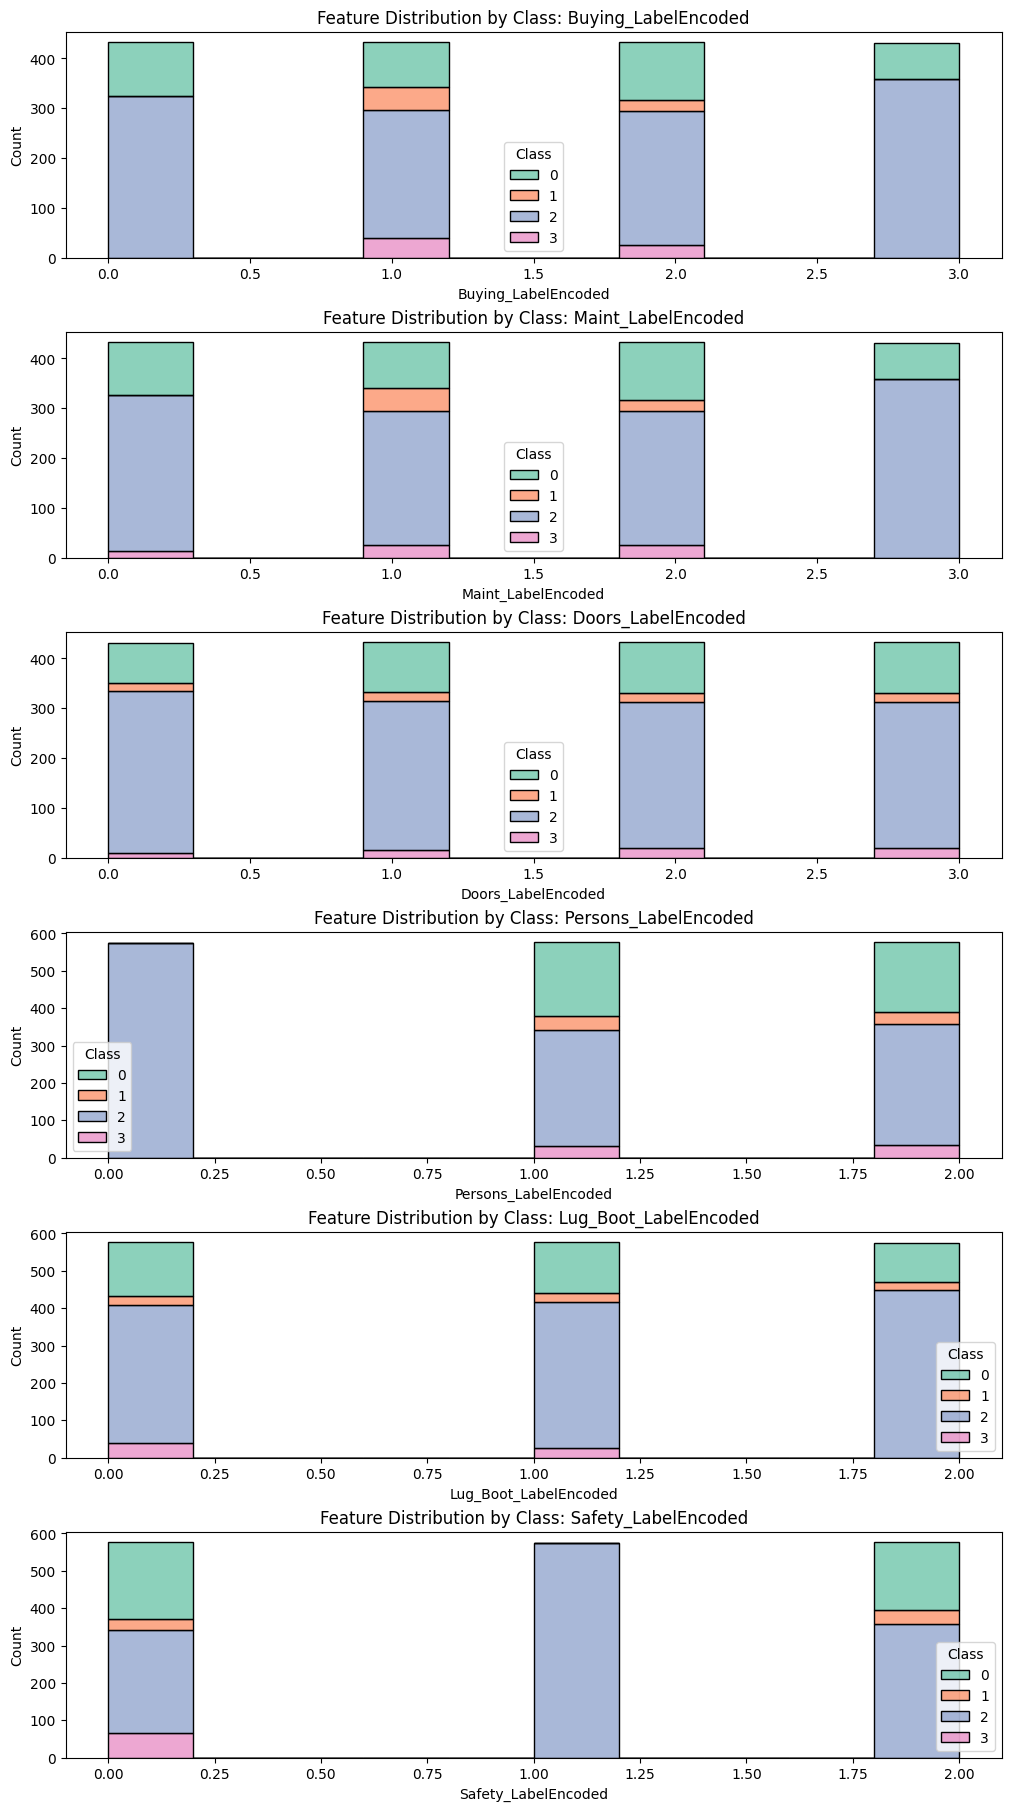

In [ ]:

# Plot feature distributions by class
features = ["Buying_LabelEncoded", "Maint_LabelEncoded", "Doors_LabelEncoded",
            "Persons_LabelEncoded", "Lug_Boot_LabelEncoded", "Safety_LabelEncoded"]

fig, axes = plt.subplots(len(features), 1, figsize=(10, 18), constrained_layout=True)

for i, feature in enumerate(features):
    sns.histplot(data=dataset, x=feature, hue=dataset["Class"],
                 multiple="stack", palette="Set2", ax=axes[i], bins=10)
    axes[i].set_title(f"Feature Distribution by Class: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

plt.show()


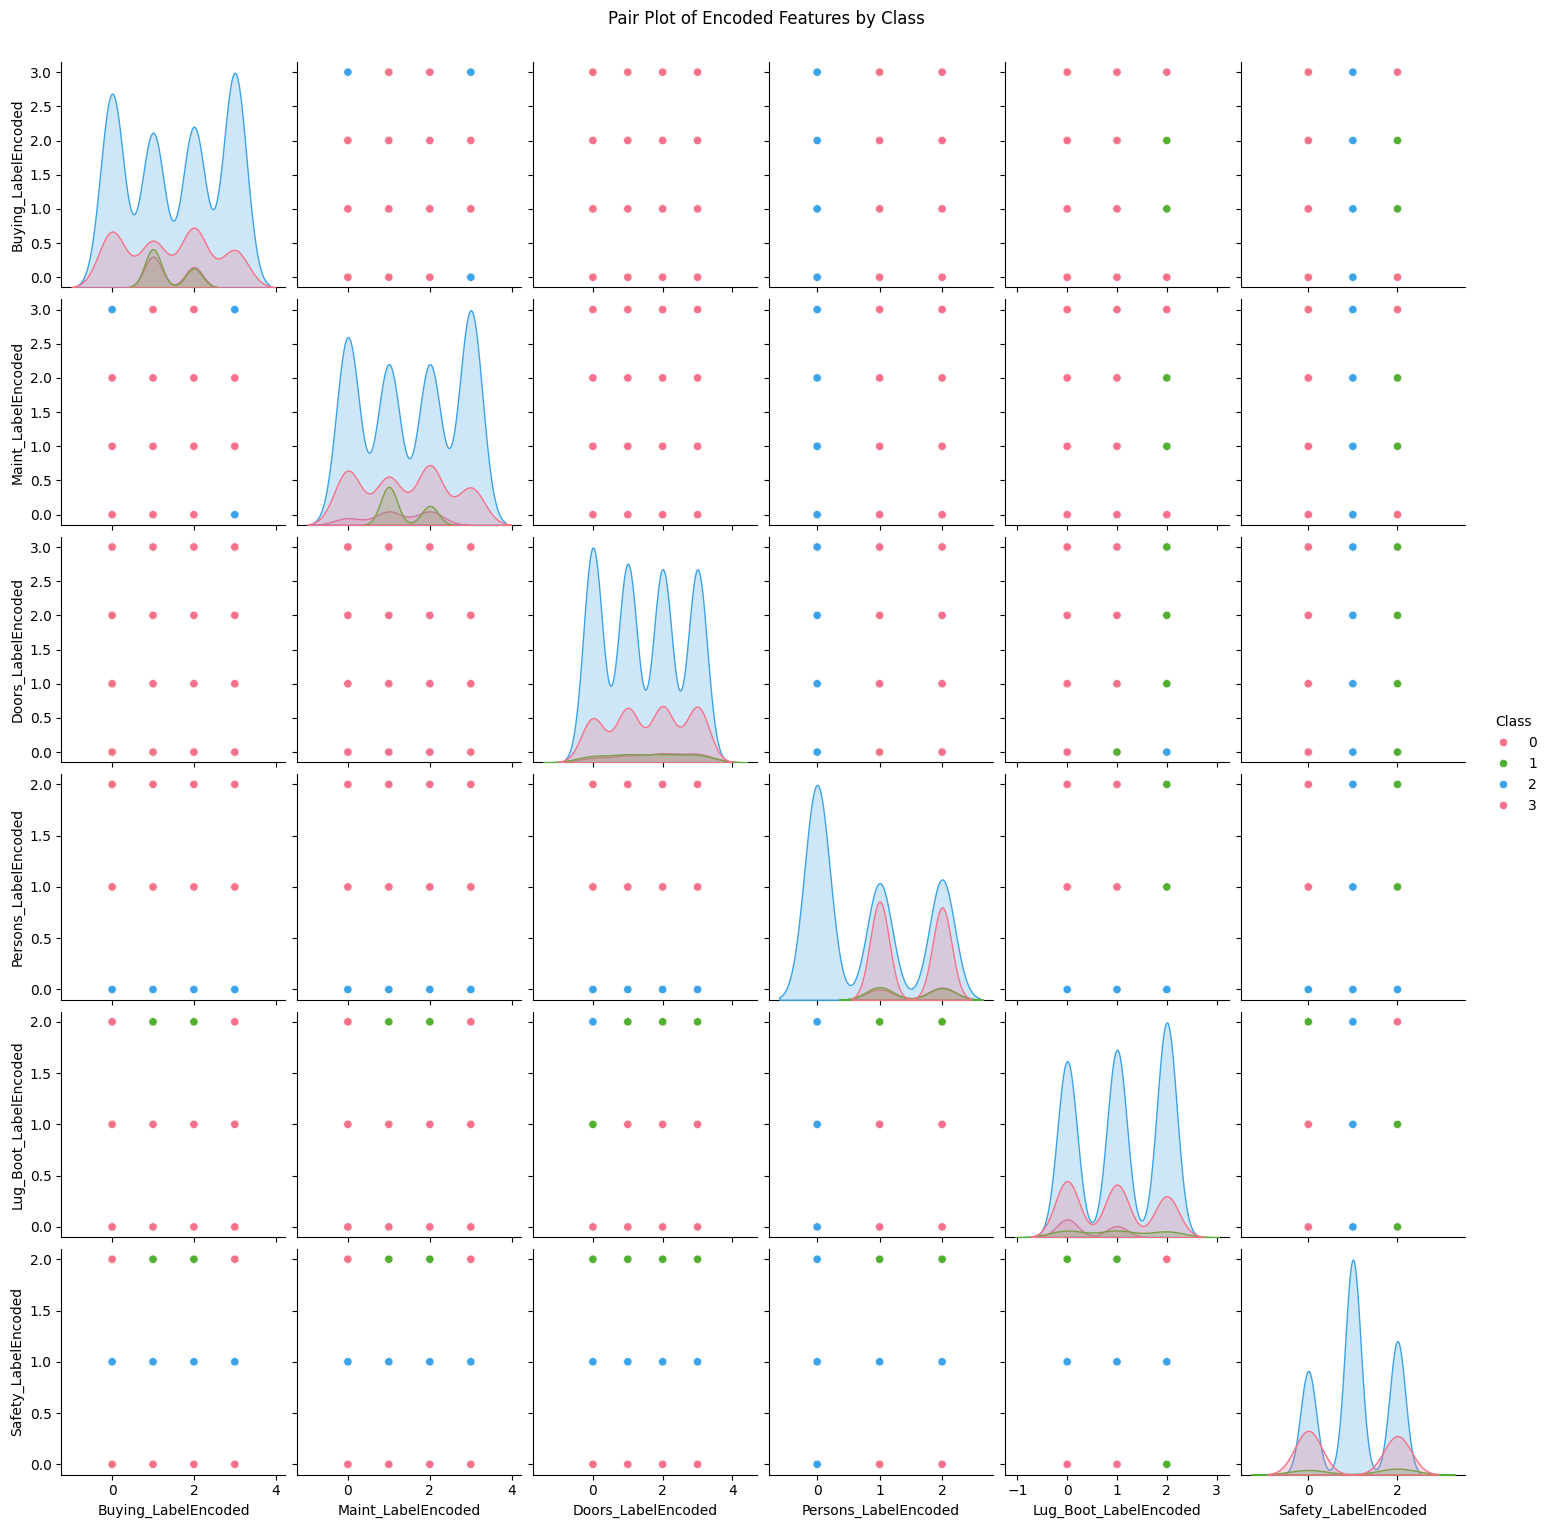

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ["Buying_LabelEncoded", "Maint_LabelEncoded", "Doors_LabelEncoded",
            "Persons_LabelEncoded", "Lug_Boot_LabelEncoded", "Safety_LabelEncoded"]

# Create a new DataFrame with only numerical features and class labels
df_pairplot = dataset[features + ["Class"]]

# Create pair plot with custom settings
sns.pairplot(data=df_pairplot, hue="Class", diag_kind="kde", palette="husl")


plt.suptitle("Pair Plot of Encoded Features by Class", y=1.02)

# Show plot
plt.show()


In [ ]:
# printed percentages to confirm accuracy

# Verify class distribution in the training and test sets
train_class_distribution = y_train.value_counts(normalize=True) * 100
test_class_distribution = y_test.value_counts(normalize=True) * 100

# Display class distribution
print("Class Distribution in Training Set (%):\n", train_class_distribution)
print("\nClass Distribution in Test Set (%):\n", test_class_distribution)


Class Distribution in Training Set (%):
 Class_LabelEncoded
2    70.021723
0    22.230268
1     3.982621
3     3.765387
Name: proportion, dtype: float64

Class Distribution in Test Set (%):
 Class_LabelEncoded
2    69.942197
0    22.254335
1     4.046243
3     3.757225
Name: proportion, dtype: float64


Below I have added a bar plot to the the percentages for easy comparison

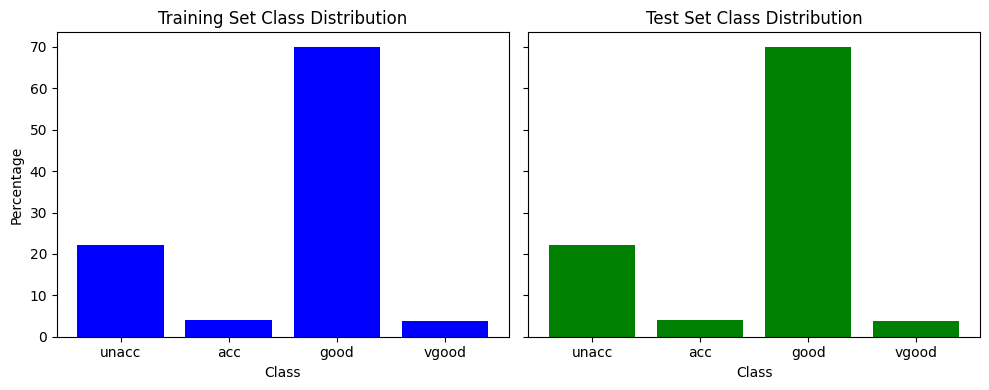

In [ ]:
import matplotlib.pyplot as plt

# train_class_distribution.index contains numeric class labels (0,1,2,3)
# This maps each numeric label to its actual class name using class_mapping

# Example:
# If train_class_distribution.index = [2, 0, 3, 1]
# Then train_labels = ['good', 'unacc', 'vgood', 'acc']
# Same logic applies to test_labels
# Since the dataset uses label encoding this dictionary maps numeric labels back to their actual class names (e.g unacc, acc )
# This makes the results easier to interpret in visualisations

# Define mapping from encoded labels to actual class names
class_mapping = {0: 'unacc', 1: 'acc', 2: 'good', 3: 'vgood'}

# Map numerical labels to their actual class names
train_labels = [class_mapping[label] for label in train_class_distribution.index]
test_labels = [class_mapping[label] for label in test_class_distribution.index]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Training set distribution
axes[0].bar(train_class_distribution.index, train_class_distribution.values, color='blue')
axes[0].set_title('Training Set Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Percentage')
axes[0].set_xticks(train_class_distribution.index) # sets the index to a meaningful name
axes[0].set_xticklabels(train_labels) # sets the index to a meaningful name


# Test set distribution
axes[1].bar(test_class_distribution.index, test_class_distribution.values, color='green')
axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_xticks(test_class_distribution.index) # sets the index to a meaningful name
axes[1].set_xticklabels(test_labels) # sets the index to a meaningful name


plt.tight_layout()
plt.show()


In [ ]:
 # prints the dataset to make sure it looks correct still
dataset.head()


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class,Buying_LabelEncoded,Maint_LabelEncoded,Doors_LabelEncoded,Persons_LabelEncoded,Lug_Boot_LabelEncoded,Safety_LabelEncoded,Class_LabelEncoded
0,3,3,0,0,2,2,2,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2,3,3,0,0,1,0,2


# **3.	Experiment design and implementation**

Design, carry out and report the main steps of your experiments and the algorithm you developed.

# a)	Start by calculating the entropy of the classes.

In [ ]:
# Function to manually compute entropy

def compute_entropy(labels):
    unique, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy_value = -sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy_value

# Compute entropy of the classes
class_entropy = compute_entropy(y_train.astype('category').cat.codes)
print("Class Entropy:", class_entropy)



Class Entropy: 1.2056036375890111


# b)	Compute information gain for the features

In [ ]:

# Function to manually compute information gain with best threshold selection
def compute_information_gain(feature_column, target):
    total_entropy = compute_entropy(target)
    unique_values = np.sort(np.unique(feature_column))
    best_gain = -1
    best_threshold = None

    for i in range(len(unique_values) - 1):
        threshold = (unique_values[i] + unique_values[i + 1]) / 2
        left_split = target[feature_column <= threshold]
        right_split = target[feature_column > threshold]

        weighted_entropy = (len(left_split) / len(target)) * compute_entropy(left_split) + \
                          (len(right_split) / len(target)) * compute_entropy(right_split)

        gain = total_entropy - weighted_entropy
        if gain > best_gain:
            best_gain = gain
            best_threshold = threshold

    return best_gain, best_threshold



# Compute information gain for each feature and determine best thresholds
info_gains = {}
best_thresholds = {}
for feature in X_train.columns:
    gain, threshold = compute_information_gain(X_train[feature], y_train.astype('category').cat.codes)
    info_gains[feature] = gain
    best_thresholds[feature] = threshold

print("Information Gain per Feature:", info_gains)
print("Best Thresholds per Feature:", best_thresholds)

# Sort features by information gain
sorted_features = sorted(info_gains, key=info_gains.get, reverse=True)

Information Gain per Feature: {'Buying': 0.04401833189729465, 'Maint': 0.03968649552386028, 'Doors': 0.0016088258310902326, 'Persons': 0.21965480995855047, 'Lug_Boot': 0.02832572368197339, 'Safety': 0.11873123482900527, 'Buying_LabelEncoded': 0.04401833189729465, 'Maint_LabelEncoded': 0.03968649552386028, 'Doors_LabelEncoded': 0.0016088258310902326, 'Persons_LabelEncoded': 0.21965480995855047, 'Lug_Boot_LabelEncoded': 0.02832572368197339, 'Safety_LabelEncoded': 0.11873123482900527}
Best Thresholds per Feature: {'Buying': 2.5, 'Maint': 2.5, 'Doors': 2.5, 'Persons': 0.5, 'Lug_Boot': 1.5, 'Safety': 0.5, 'Buying_LabelEncoded': 2.5, 'Maint_LabelEncoded': 2.5, 'Doors_LabelEncoded': 2.5, 'Persons_LabelEncoded': 0.5, 'Lug_Boot_LabelEncoded': 1.5, 'Safety_LabelEncoded': 0.5}


# c)	Based on the information gain, determine the best split and which feature should be selected first to build a decision tree for this dataset.

In [ ]:
# Select the best feature for splitting
best_feature = sorted_features[0]
best_threshold = best_thresholds[best_feature]
second_best_feature = sorted_features[1]
second_best_threshold = best_thresholds[second_best_feature]
third_best_feature = sorted_features[2]
third_best_threshold = best_thresholds[third_best_feature]

print("Best Feature for First Split:", best_feature, "at threshold", best_threshold)
print("Second Best Feature:", second_best_feature, "at threshold", second_best_threshold)
print("Third Best Feature:", third_best_feature, "at threshold", third_best_threshold)

Best Feature for First Split: Persons at threshold 0.5
Second Best Feature: Persons_LabelEncoded at threshold 0.5
Third Best Feature: Safety at threshold 0.5


# d)	Implement the decision tree. Explain the overall flow of your decision tree algorithm and provide visualisation.

In [ ]:
def classify(instance):
    if instance[best_feature] == 0:
        if instance[second_best_feature] == 0:
            return 0
        else:
            return 1
    else:
        if instance[third_best_feature] == 0:
            return 1
        else:
            return 2


# Evaluate classifier
predictions = X_test.apply(classify, axis=1)
accuracy = np.mean(predictions == y_test)
print("Decision Tree Accuracy:", accuracy)



Decision Tree Accuracy: 0.32947976878612717


# changining the threshold to improve the accuracy

using a range based check to see if this improve accuracy

In [ ]:

# Updated classify function returning numeric labels
def classify(instance):
    if instance[best_feature] <= best_threshold:
        if instance[second_best_feature] <= second_best_threshold:
            return 0
        else:
            return 1
    else:
        if instance[third_best_feature] <= third_best_threshold:
            return 1
        else:
            return 2

# Evaluate classifier
predictions = X_test.apply(classify, axis=1)

# Ensure predictions are converted to NumPy array for comparison
predictions = predictions.to_numpy()

accuracy = np.mean(predictions == y_test)
print("Decision Tree Accuracy:", accuracy)






Decision Tree Accuracy: 0.32947976878612717


# using the threshold to improve accuracy

In [ ]:
def classify(instance):

# Check the value of the best feature ('Persons') against its threshold (0.5)

    if instance[best_feature] == 0.5 :

   # If 'Persons' equals 0.5, check the second best feature ('Persons_LabelEncoded')

        if instance[second_best_feature] == 0.5:
            return 0
        else:
            return 1
    else:

    # If 'Persons' does not equal 0.5, check the third best feature ('Safety')

        if instance[third_best_feature] == 0.5:
            return 1
        else:
            return 2


# Evaluate classifier
# classify function used to make predictions for all rows in X_test
predictions = X_test.apply(classify, axis=1)
accuracy = np.mean(predictions == y_test)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.6994219653179191


# giniidex used to improve decision accuracy

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Uses the Gini Index as the criteria for measuring the quality of a split
# (max_depth=3:) Limits the depth of the tree to 3 levels to prevent overfitting and control complexity
# (random_state=42): Set a random seed for reproducibility

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


# "X_train": Input features for training
# "y_train": Target labels for training
decision_tree.fit(X_train, y_train)


predictions = decision_tree.predict(X_test)


# Compares predicted labels with the actual labels

accuracy = accuracy_score(y_test, predictions)
print("Decision Tree Accuracy with Gini Index:", accuracy)



Decision Tree Accuracy with Gini Index: 0.7890173410404624


# decision tree accuracy improved by adding layers

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


decision_tree = DecisionTreeClassifier(criterion='gini',
                                        max_depth=5,  # Increase depth to add more layers
                                        min_samples_split=2,  # Minimum samples to split a node
                                        min_samples_leaf=1,  # Minimum samples at a leaf node
                                        random_state=42)


decision_tree.fit(X_train, y_train)


predictions = decision_tree.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Improved Decision Tree Accuracy with Additional Layers:", accuracy)



Improved Decision Tree Accuracy with Additional Layers: 0.8815028901734104


# Decision tree visualisation

In [ ]:
!pip install anytree
from anytree import Node, RenderTree
from anytree.exporter import DotExporter # Import DotExporter from anytree.exporter

In [ ]:
# Building decision tree structure using anytree (Run 1)
root = Node("Root")
best_node = Node(best_feature, parent=root)
second_left = Node(second_best_feature + " (Left Child)", parent=best_node)
second_right = Node(second_best_feature + " (Right Child)", parent=best_node)
third_left = Node(third_best_feature + " (Left-Left)", parent=second_left)
third_right = Node(third_best_feature + " (Left-Right)", parent=second_left)


# Save tree visualization
DotExporter(root).to_picture("decision_tree.png")

# Print tree structure
for pre, _, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

Root
└── Persons
    ├── Persons_LabelEncoded (Left Child)
    │   ├── Safety (Left-Left)
    │   └── Safety (Left-Right)
    └── Persons_LabelEncoded (Right Child)


# Advanced visualisation

Model Accuracy: 0.6994219653179191


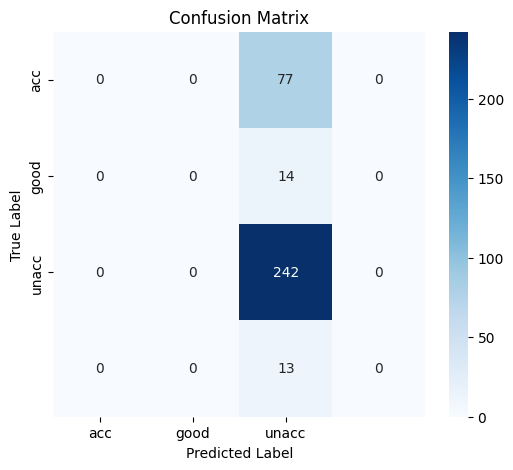

In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluate classifier
predictions = X_test.apply(classify, axis=1)

# Convert string labels to numeric for confusion matrix
y_test_numeric = y_test.replace({"acc": 0, "good": 1, "unacc": 2})
predictions_numeric = predictions.replace({"acc": 0, "good": 1, "unacc": 2})

# Compute accuracy
accuracy = np.mean(predictions == y_test)
print("Model Accuracy:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, predictions_numeric)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["acc", "good", "unacc"], yticklabels=["acc", "good", "unacc"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# code to build better tree 

In [200]:
def build_better_tree(X, y, parent=None, depth=0, max_depth=5):


  # Base case: stop splitting if all labels are the same or max depth is reached
    if len(y.unique()) == 1 or depth == max_depth:


   # If there are no more samples in y, return a placeholder node
        if y.empty:
            return Node("None", parent=parent)  # Node with no value, acts as a placeholder
        else:
            return Node(prediction=str(y.iloc[0]), parent=parent)  # Otherwise, return a leaf node with the majority class prediction

# Chooses the best feature "Persons" to split on
    best_feature = "Persons" if "Persons" in X.columns else X.columns[0]

 #Calculate the median of the best feature to use as the threshold for splitting
    median_value = X[best_feature].median()



# Create the current root node for the tree, specifying the split condition
    root = Node(feature=f"{best_feature} <= {median_value:.2f}", parent=parent)

  # Create masks to divide the dataset based on the splitting threshold
    left_mask = X[best_feature] <= median_value
    right_mask = X[best_feature] > median_value

   # Recursively build the left and right subtrees
    left_child = build_better_tree(X[left_mask], y[left_mask], parent=root, depth=depth+1, max_depth=max_depth)
    right_child = build_better_tree(X[right_mask], y[right_mask], parent=root, depth=depth+1, max_depth=max_depth)

   # Link the left and right children to the root node
    root.value['left'] = left_child
    root.value['right'] = right_child

    return root

In [ ]:
# Build decision tree
decision_tree_root = build_better_tree(X_train, y_train)



# Function to visualize tree
DotExporter(decision_tree_root).to_picture("decision_tree_better.png")

# Print tree structure
for pre, _, node in RenderTree(decision_tree_root):
    print("%s%s" % (pre, node.name))

Buying <= 1.00
├── Buying <= 0.00
│   ├── Buying <= 0.00
│   │   ├── Buying <= 0.00
│   │   │   ├── Buying <= 0.00
│   │   │   │   ├── 2
│   │   │   │   └── None
│   │   │   └── Buying <= nan
│   │   │       ├── None
│   │   │       └── None
│   │   └── Buying <= nan
│   │       ├── Buying <= nan
│   │       │   ├── None
│   │       │   └── None
│   │       └── Buying <= nan
│   │           ├── None
│   │           └── None
│   └── Buying <= 1.00
│       ├── Buying <= 1.00
│       │   ├── Buying <= 1.00
│       │   │   ├── 2
│       │   │   └── None
│       │   └── Buying <= nan
│       │       ├── None
│       │       └── None
│       └── Buying <= nan
│           ├── Buying <= nan
│           │   ├── None
│           │   └── None
│           └── Buying <= nan
│               ├── None
│               └── None
└── Buying <= 2.00
    ├── Buying <= 2.00
    │   ├── Buying <= 2.00
    │   │   ├── Buying <= 2.00
    │   │   │   ├── 2
    │   │   │   └── None
    │   │   └── Buying <= nan
 

## Visual decision tree

In [199]:
from graphviz import Digraph

# Define a Node class to represent a node in the decision tree
class Node:
    def __init__(self, feature=None, prediction=None, parent=None):
        self.feature = feature
        self.prediction = prediction
        self.parent = parent
        self.is_leaf = prediction is not None


from graphviz import Digraph

def visualize_tree(node, graph=None, parent_name=None, edge_label=""):
    """Recursively generate a Graphviz representation of the decision tree."""
    if graph is None:  # If no Graphviz graph object is passed it creates a new one
        graph = Digraph(format="png")  # Create a new graph object with PNG format
    node_name = str(id(node))   # Create a unique identifier for the current node


# Check if the current node is a leaf
    if node.is_leaf:
        graph.node(node_name, label=f"Class: {node.prediction}", shape="ellipse", style="filled", fillcolor="lightblue") # design features of the decision tree so all uniformed
    else:
        graph.node(node_name, label=f"Feature: {node.feature}", shape="box", style="filled", fillcolor="lightgray")  # design features of the decision tree so all uniformed


# design features of the decision tree so all uniformed

    if parent_name:
        graph.edge(parent_name, node_name, label=edge_label)



# If the current node is not a leaf, recursively process its children

    if not node.is_leaf:
        for value, child in node.value.items():
            visualize_tree(child, graph, node_name, edge_label=value)

    return graph

# Generate the tree visualization
tree = build_better_tree(X_train, y_train)
graph = visualize_tree(tree)
graph.render("decision_tree")  #  displays the tree saves as png file


'decision_tree.png'